# IPL auction 2024

## Import Libraries

In [41]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-processing

In [2]:
data = pd.read_csv("auction.csv")
data.head(10)

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,140000000
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,84000000
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,40000000
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,20000000
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,18000000
5,Avanish Rao Aravelly,Indian,Wicket-Keeper,Chennai Super Kings,2000000
6,Kumar Kushagra,Indian,Wicket-Keeper,Delhi Capitals,72000000
7,Jhye Richardson,Overseas,Bowler,Delhi Capitals,50000000
8,Harry Brook,Overseas,Batter,Delhi Capitals,40000000
9,Sumit Kumar,Indian,All-Rounder,Delhi Capitals,10000000


In [3]:
# Price is in pkr

data['PRICE PAID'] = data['PRICE PAID'] * 3.33

In [4]:
data.head()

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,466200000.0
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,279720000.0
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,133200000.0
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,66600000.0
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,59940000.0


In [5]:
# Descriptive Statistics of dataset

data.describe()

,PRICE PAID
count,7.200000e+01
mean,1.065831e+08
std,1.551709e+08
min,6.660000e+06
25%,6.660000e+06
50%,4.162500e+07
75%,1.615050e+08
max,8.241750e+08


In [6]:
# Information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER       72 non-null     object 
 1   NATIONALITY  72 non-null     object 
 2   TYPE         72 non-null     object 
 3   TEAM         72 non-null     object 
 4   PRICE PAID   72 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [7]:
# Total count in a dataset

data.count()

PLAYER         72
NATIONALITY    72
TYPE           72
TEAM           72
PRICE PAID     72
dtype: int64

In [8]:
# Check for duplicates

data.duplicated().any()     

False

In [9]:
data.duplicated().sum()    # no duplicates

0

In [10]:
O_players = data[data['NATIONALITY'] == 'Overseas']['PLAYER']
O_players

0          Daryl Mitchell
3       Mustafizur Rahman
4         Rachin Ravindra
7         Jhye Richardson
8             Harry Brook
10              Shai Hope
11         Tristan Stubbs
15        Spencer Johnson
21     Azmatullah Omarzai
23         Mitchell Starc
24          Mujeeb Rahman
25    Sherfane Rutherford
26           Gus Atkinson
35           David Willey
36          Ashton Turner
39         Gerald Coetzee
40         Nuwan Thushara
41     Dilshan Madushanka
42          Mohammad Nabi
48          Rilee Rossouw
49           Chris Woakes
55          Rovman Powell
57          Nandre Burger
58     Tom Kohler-Cadmore
60         Alzarri Joseph
62        Lockie Ferguson
63             Tom Curran
66            Pat Cummins
67            Travis Head
69      Wanindu Hasaranga
Name: PLAYER, dtype: object

In [11]:
O_players.count()

30

In [12]:
# According to this IPL 2024 dataset from Kaggle, there are 30 Overseas players and 52 Indian (local) players

In [13]:
TEAMS = data.TEAM
TEAMS.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bengaluru',
       'Sunrisers Hyderabad'], dtype=object)

In [14]:
TEAMS_length = len(TEAMS.unique())   # Total teams

In [15]:
All_TYPE = data[data['TYPE'] == 'All-Rounder']['PLAYER']
All_TYPE

0              Daryl Mitchell
2              Shardul Thakur
4             Rachin Ravindra
9                 Sumit Kumar
16              Shahrukh Khan
21         Azmatullah Omarzai
31            Ramandeep Singh
35               David Willey
37            Arshin Kulkarni
38          Mohd. Arshad Khan
39             Gerald Coetzee
42              Mohammad Nabi
44            Shivalik Sharma
45              Anshul Kamboj
46                 Naman Dhir
47              Harshal Patel
49               Chris Woakes
50         Tanay Thyagarajann
51    Vishwanath Pratap Singh
52            Ashutosh Sharma
59               Abid Mushtaq
63                 Tom Curran
65              Swapnil Singh
66                Pat Cummins
69          Wanindu Hasaranga
Name: PLAYER, dtype: object

In [16]:
All_TYPE.count()

25

In [17]:
Bat_TYPE = data[data['TYPE'] == 'Batter']['PLAYER']
Bat_TYPE

1             Sameer Rizvi
8              Harry Brook
13        Swastik Chhikara
25     Sherfane Rutherford
27           Manish Pandey
30    Angkrish Raghuvanshi
36           Ashton Turner
48           Rilee Rossouw
53          Shashank Singh
55           Rovman Powell
56           Shubham Dubey
64          Saurav Chuahan
67             Travis Head
Name: PLAYER, dtype: object

In [18]:
Bat_TYPE.count()

13

In [19]:
Ball_TYPE = data[data['TYPE'] == 'Bowler']['PLAYER']
Ball_TYPE

3          Mustafizur Rahman
7            Jhye Richardson
14                Rasikh Dar
15           Spencer Johnson
17               Umesh Yadav
19            Sushant Mishra
20              Kartik Tyagi
22              Manav Suthar
23            Mitchell Starc
24             Mujeeb Rahman
26              Gus Atkinson
29           Chetan Sakariya
32             Sakib Hussain
33               Shivam Mavi
34              M. Siddharth
40            Nuwan Thushara
41        Dilshan Madushanka
43             Shreyas Gopal
54          Prince Choudhary
57             Nandre Burger
60            Alzarri Joseph
61                Yash Dayal
62           Lockie Ferguson
68            Jaydev Unadkat
70    Jhathavedh Subramanyan
71               Akash Singh
Name: PLAYER, dtype: object

In [20]:
Ball_TYPE.count()

26

In [21]:
Wick_TYPE = data[data['TYPE'] == 'Wicket-Keeper']['PLAYER']
Wick_TYPE

5     Avanish Rao Aravelly
6           Kumar Kushagra
10               Shai Hope
11          Tristan Stubbs
12              Ricky Bhui
18              Robin Minz
28             K.S. Bharat
58      Tom Kohler-Cadmore
Name: PLAYER, dtype: object

In [22]:
Wick_TYPE.count()

8

In [23]:
data['PRICE PAID'].max()

824175000.0

In [24]:
data['PRICE PAID'].min()

6660000.0

## Data Analysis

In [25]:
# Highest paid player

Highest_paid = data['PRICE PAID'].max()
H_player = data[data['PRICE PAID'] == Highest_paid]
H_player

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
23,Mitchell Starc,Overseas,Bowler,Kolkata Knight Riders,824175000.0


In [26]:
# Lowest paid player

lowest_paid = data['PRICE PAID'].min()
L_player = data[data['PRICE PAID'] == lowest_paid]
L_player

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
5,Avanish Rao Aravelly,Indian,Wicket-Keeper,Chennai Super Kings,6660000.0
12,Ricky Bhui,Indian,Wicket-Keeper,Delhi Capitals,6660000.0
13,Swastik Chhikara,Indian,Batter,Delhi Capitals,6660000.0
14,Rasikh Dar,Indian,Bowler,Delhi Capitals,6660000.0
22,Manav Suthar,Indian,Bowler,Gujarat Titans,6660000.0
30,Angkrish Raghuvanshi,Indian,Batter,Kolkata Knight Riders,6660000.0
31,Ramandeep Singh,Indian,All-Rounder,Kolkata Knight Riders,6660000.0
32,Sakib Hussain,Indian,Bowler,Kolkata Knight Riders,6660000.0
37,Arshin Kulkarni,Indian,All-Rounder,Lucknow Super Giants,6660000.0
38,Mohd. Arshad Khan,Indian,All-Rounder,Lucknow Super Giants,6660000.0


In [27]:
L_player['PLAYER'].count()    # Among all players, 24 received the lowest salary of 6660000.0

24

In [188]:

# function for full team information

def Team_players(team):
    
    player = data[data['TEAM'] == team]
    count = player['PLAYER'].count()
    price = player['PRICE PAID'].sum()
    
    all_count = player[player['TYPE'] == 'All-Rounder'].count()
    all_pl = all_count.values[0]
    bat_count = player[player['TYPE'] == 'Batter'].count()
    bat_pl = bat_count.values[0]
    ball_count = player[player['TYPE'] == 'Bowler'].count()
    ball_pl = ball_count.values[0]
    wicket_count = player[player['TYPE'] == 'Wicket-Keeper'].count()
    wicket_pl = wicket_count.values[0]
    
    h_price = player['PRICE PAID'].max()
    h_player = player[player['PRICE PAID'] == h_price]['PLAYER']
    h_nation = player['NATIONALITY'].values[0]
    
    overseas = player[player['NATIONALITY'] == 'Overseas'].count()
    overseas_p = overseas.values[0]
    indian = player[player['NATIONALITY'] == 'Indian'].count()
    indian_p = indian.values[0]
    
    print("The total players in", team, "is", count)
    print("The total budget of", team, "is", price)
    print("All-Rounder :", all_pl)
    print("Batsman :", bat_pl)
    print("Bowler :", ball_pl)
    print("Wicket Keeper :", wicket_pl)
    print("The Overseas players are :", overseas_p)
    print("The Indian players are :", indian_p)
    print("The Highest paid player of",team, "is", h_player.values, "earning", h_price,"Rs and he is an", h_nation, "player")
    return player
    
    

In [189]:
Team_players('Sunrisers Hyderabad')

The total players in Sunrisers Hyderabad is 6
The total budget of Sunrisers Hyderabad is 1025640000.0
All-Rounder : 2
Batsman : 1
Bowler : 3
Wicket Keeper : 0
The Overseas players are : 3
The Indian players are : 3
The Highest paid player of Sunrisers Hyderabad is ['Pat Cummins'] earning 682650000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
66,Pat Cummins,Overseas,All-Rounder,Sunrisers Hyderabad,682650000.0
67,Travis Head,Overseas,Batter,Sunrisers Hyderabad,226440000.0
68,Jaydev Unadkat,Indian,Bowler,Sunrisers Hyderabad,53280000.0
69,Wanindu Hasaranga,Overseas,All-Rounder,Sunrisers Hyderabad,49950000.0
70,Jhathavedh Subramanyan,Indian,Bowler,Sunrisers Hyderabad,6660000.0
71,Akash Singh,Indian,Bowler,Sunrisers Hyderabad,6660000.0


In [190]:
Team_players('Royal Challengers Bengaluru')

The total players in Royal Challengers Bengaluru is 6
The total budget of Royal Challengers Bengaluru is 679320000.0
All-Rounder : 2
Batsman : 1
Bowler : 3
Wicket Keeper : 0
The Overseas players are : 3
The Indian players are : 3
The Highest paid player of Royal Challengers Bengaluru is ['Alzarri Joseph'] earning 382950000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
60,Alzarri Joseph,Overseas,Bowler,Royal Challengers Bengaluru,382950000.0
61,Yash Dayal,Indian,Bowler,Royal Challengers Bengaluru,166500000.0
62,Lockie Ferguson,Overseas,Bowler,Royal Challengers Bengaluru,66600000.0
63,Tom Curran,Overseas,All-Rounder,Royal Challengers Bengaluru,49950000.0
64,Saurav Chuahan,Indian,Batter,Royal Challengers Bengaluru,6660000.0
65,Swapnil Singh,Indian,All-Rounder,Royal Challengers Bengaluru,6660000.0


In [191]:
Team_players('Punjab Kings')

The total players in Punjab Kings is 8
The total budget of Punjab Kings is 830835000.0
All-Rounder : 5
Batsman : 2
Bowler : 1
Wicket Keeper : 0
The Overseas players are : 2
The Indian players are : 6
The Highest paid player of Punjab Kings is ['Harshal Patel'] earning 391275000.0 Rs and he is an Indian player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
47,Harshal Patel,Indian,All-Rounder,Punjab Kings,391275000.0
48,Rilee Rossouw,Overseas,Batter,Punjab Kings,266400000.0
49,Chris Woakes,Overseas,All-Rounder,Punjab Kings,139860000.0
50,Tanay Thyagarajann,Indian,All-Rounder,Punjab Kings,6660000.0
51,Vishwanath Pratap Singh,Indian,All-Rounder,Punjab Kings,6660000.0
52,Ashutosh Sharma,Indian,All-Rounder,Punjab Kings,6660000.0
53,Shashank Singh,Indian,Batter,Punjab Kings,6660000.0
54,Prince Choudhary,Indian,Bowler,Punjab Kings,6660000.0


In [192]:
Team_players('Mumbai Indians')

The total players in Mumbai Indians is 8
The total budget of Mumbai Indians is 556110000.0
All-Rounder : 5
Batsman : 0
Bowler : 3
Wicket Keeper : 0
The Overseas players are : 4
The Indian players are : 4
The Highest paid player of Mumbai Indians is ['Gerald Coetzee'] earning 166500000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
39,Gerald Coetzee,Overseas,All-Rounder,Mumbai Indians,166500000.0
40,Nuwan Thushara,Overseas,Bowler,Mumbai Indians,159840000.0
41,Dilshan Madushanka,Overseas,Bowler,Mumbai Indians,153180000.0
42,Mohammad Nabi,Overseas,All-Rounder,Mumbai Indians,49950000.0
43,Shreyas Gopal,Indian,Bowler,Mumbai Indians,6660000.0
44,Shivalik Sharma,Indian,All-Rounder,Mumbai Indians,6660000.0
45,Anshul Kamboj,Indian,All-Rounder,Mumbai Indians,6660000.0
46,Naman Dhir,Indian,All-Rounder,Mumbai Indians,6660000.0


In [193]:
Team_players('Kolkata Knight Riders')

The total players in Kolkata Knight Riders is 10
The total budget of Kolkata Knight Riders is 1043955000.0
All-Rounder : 1
Batsman : 3
Bowler : 5
Wicket Keeper : 1
The Overseas players are : 4
The Indian players are : 6
The Highest paid player of Kolkata Knight Riders is ['Mitchell Starc'] earning 824175000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
23,Mitchell Starc,Overseas,Bowler,Kolkata Knight Riders,824175000.0
24,Mujeeb Rahman,Overseas,Bowler,Kolkata Knight Riders,66600000.0
25,Sherfane Rutherford,Overseas,Batter,Kolkata Knight Riders,49950000.0
26,Gus Atkinson,Overseas,Bowler,Kolkata Knight Riders,33300000.0
27,Manish Pandey,Indian,Batter,Kolkata Knight Riders,16650000.0
28,K.S. Bharat,Indian,Wicket-Keeper,Kolkata Knight Riders,16650000.0
29,Chetan Sakariya,Indian,Bowler,Kolkata Knight Riders,16650000.0
30,Angkrish Raghuvanshi,Indian,Batter,Kolkata Knight Riders,6660000.0
31,Ramandeep Singh,Indian,All-Rounder,Kolkata Knight Riders,6660000.0
32,Sakib Hussain,Indian,Bowler,Kolkata Knight Riders,6660000.0


In [194]:
Team_players('Delhi Capitals')

The total players in Delhi Capitals is 9
The total budget of Delhi Capitals is 634365000.0
All-Rounder : 1
Batsman : 2
Bowler : 2
Wicket Keeper : 4
The Overseas players are : 4
The Indian players are : 5
The Highest paid player of Delhi Capitals is ['Kumar Kushagra'] earning 239760000.0 Rs and he is an Indian player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
6,Kumar Kushagra,Indian,Wicket-Keeper,Delhi Capitals,239760000.0
7,Jhye Richardson,Overseas,Bowler,Delhi Capitals,166500000.0
8,Harry Brook,Overseas,Batter,Delhi Capitals,133200000.0
9,Sumit Kumar,Indian,All-Rounder,Delhi Capitals,33300000.0
10,Shai Hope,Overseas,Wicket-Keeper,Delhi Capitals,24975000.0
11,Tristan Stubbs,Overseas,Wicket-Keeper,Delhi Capitals,16650000.0
12,Ricky Bhui,Indian,Wicket-Keeper,Delhi Capitals,6660000.0
13,Swastik Chhikara,Indian,Batter,Delhi Capitals,6660000.0
14,Rasikh Dar,Indian,Bowler,Delhi Capitals,6660000.0


In [195]:
Team_players('Lucknow Super Giants')

The total players in Lucknow Super Giants is 6
The total budget of Lucknow Super Giants is 406260000.0
All-Rounder : 3
Batsman : 1
Bowler : 2
Wicket Keeper : 0
The Overseas players are : 2
The Indian players are : 4
The Highest paid player of Lucknow Super Giants is ['Shivam Mavi'] earning 213120000.0 Rs and he is an Indian player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
33,Shivam Mavi,Indian,Bowler,Lucknow Super Giants,213120000.0
34,M. Siddharth,Indian,Bowler,Lucknow Super Giants,79920000.0
35,David Willey,Overseas,All-Rounder,Lucknow Super Giants,66600000.0
36,Ashton Turner,Overseas,Batter,Lucknow Super Giants,33300000.0
37,Arshin Kulkarni,Indian,All-Rounder,Lucknow Super Giants,6660000.0
38,Mohd. Arshad Khan,Indian,All-Rounder,Lucknow Super Giants,6660000.0


In [196]:
Team_players('Chennai Super Kings')

The total players in Chennai Super Kings is 6
The total budget of Chennai Super Kings is 1012320000.0
All-Rounder : 3
Batsman : 1
Bowler : 1
Wicket Keeper : 1
The Overseas players are : 3
The Indian players are : 3
The Highest paid player of Chennai Super Kings is ['Daryl Mitchell'] earning 466200000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,466200000.0
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,279720000.0
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,133200000.0
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,66600000.0
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,59940000.0
5,Avanish Rao Aravelly,Indian,Wicket-Keeper,Chennai Super Kings,6660000.0


In [197]:
Team_players('Rajasthan Royals')

The total players in Rajasthan Royals is 5
The total budget of Rajasthan Royals is 476190000.0
All-Rounder : 1
Batsman : 2
Bowler : 1
Wicket Keeper : 1
The Overseas players are : 3
The Indian players are : 2
The Highest paid player of Rajasthan Royals is ['Rovman Powell'] earning 246420000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
55,Rovman Powell,Overseas,Batter,Rajasthan Royals,246420000.0
56,Shubham Dubey,Indian,Batter,Rajasthan Royals,193140000.0
57,Nandre Burger,Overseas,Bowler,Rajasthan Royals,16650000.0
58,Tom Kohler-Cadmore,Overseas,Wicket-Keeper,Rajasthan Royals,13320000.0
59,Abid Mushtaq,Indian,All-Rounder,Rajasthan Royals,6660000.0


In [198]:
Team_players('Gujarat Titans')

The total players in Gujarat Titans is 8
The total budget of Gujarat Titans is 1008990000.0
All-Rounder : 2
Batsman : 0
Bowler : 5
Wicket Keeper : 1
The Overseas players are : 2
The Indian players are : 6
The Highest paid player of Gujarat Titans is ['Spencer Johnson'] earning 333000000.0 Rs and he is an Overseas player


,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
15,Spencer Johnson,Overseas,Bowler,Gujarat Titans,333000000.0
16,Shahrukh Khan,Indian,All-Rounder,Gujarat Titans,246420000.0
17,Umesh Yadav,Indian,Bowler,Gujarat Titans,193140000.0
18,Robin Minz,Indian,Wicket-Keeper,Gujarat Titans,119880000.0
19,Sushant Mishra,Indian,Bowler,Gujarat Titans,73260000.0
20,Kartik Tyagi,Indian,Bowler,Gujarat Titans,19980000.0
21,Azmatullah Omarzai,Overseas,All-Rounder,Gujarat Titans,16650000.0
22,Manav Suthar,Indian,Bowler,Gujarat Titans,6660000.0


## Data Visualization

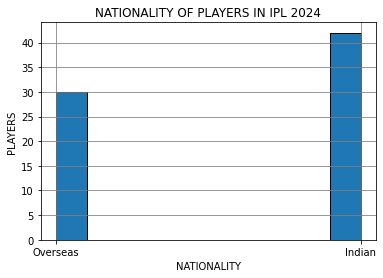

In [200]:
plt.hist(data['NATIONALITY'], bins=10, edgecolor='black')
plt.title('NATIONALITY OF PLAYERS IN IPL 2024')
plt.xlabel('NATIONALITY')
plt.ylabel('PLAYERS')
plt.grid(True, color='gray')
plt.show()

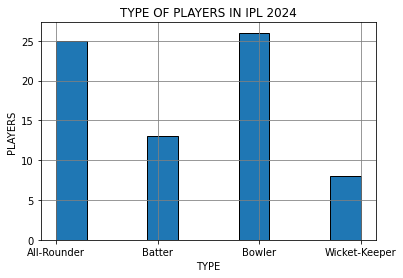

In [201]:
plt.hist(data['TYPE'], bins=10, edgecolor='black')
plt.title('TYPE OF PLAYERS IN IPL 2024')
plt.xlabel('TYPE')
plt.ylabel('PLAYERS')
plt.grid(True, color='gray')
plt.show()

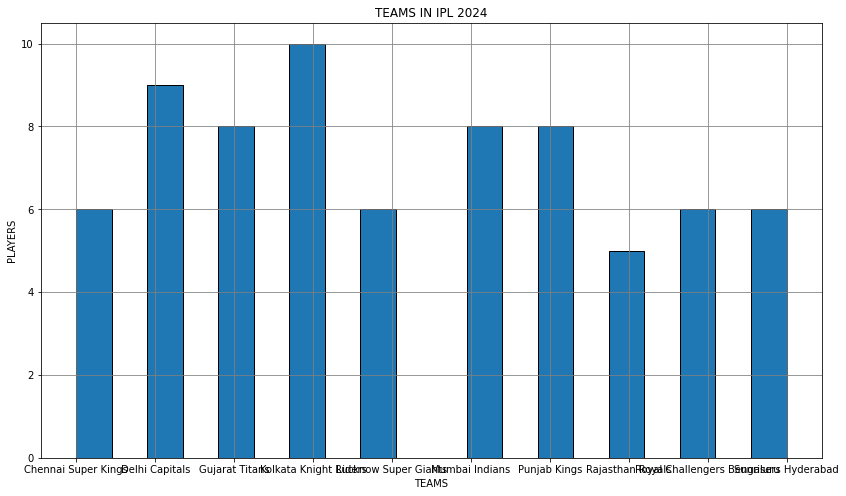

In [202]:
plt.figure(figsize=(14, 8))
plt.hist(data['TEAM'], bins=20, edgecolor='black')
plt.title('TEAMS IN IPL 2024')
plt.xlabel('TEAMS')
plt.ylabel('PLAYERS')
plt.grid(True, color='gray')
plt.show()

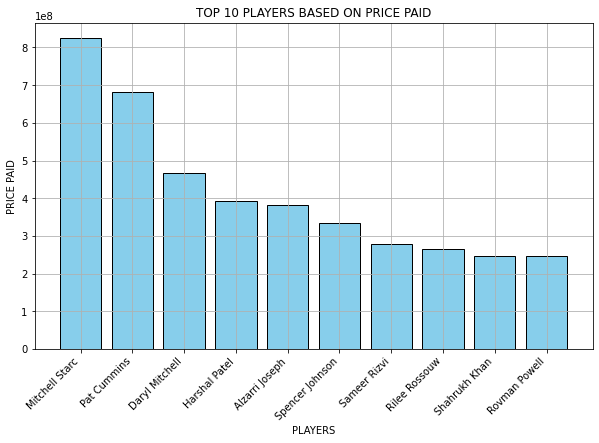

In [203]:

# Sort the data by 'PRICE PAID' column in descending order
top_players = data.sort_values(by='PRICE PAID', ascending=False).head(10)

# Create a bar plot to visualize the top 5 players
plt.figure(figsize=(10, 6))
plt.bar(top_players['PLAYER'], top_players['PRICE PAID'], color='skyblue', edgecolor = 'black')
plt.title('TOP 10 PLAYERS BASED ON PRICE PAID')
plt.xlabel('PLAYERS')
plt.ylabel('PRICE PAID')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid()
plt.show()


In [225]:
team_budgets = data.groupby('TEAM')['PRICE PAID'].sum()
top_teams = team_budgets.sort_values(ascending=False).head()
top_teams

TEAM
Kolkata Knight Riders    1.043955e+09
Sunrisers Hyderabad      1.025640e+09
Chennai Super Kings      1.012320e+09
Gujarat Titans           1.008990e+09
Punjab Kings             8.308350e+08
Name: PRICE PAID, dtype: float64

Text(0.5, 1.0, 'TOP 5 TEAMS BY TOTAL BUDGET')

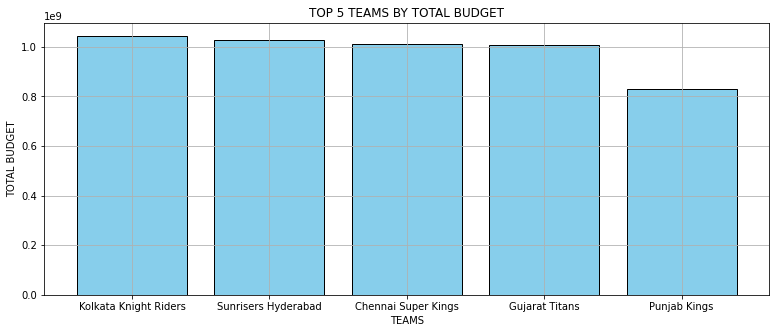

In [259]:
plt.figure(figsize=(13, 5))
plt.bar(top_teams.index, top_teams.values, color='skyblue', edgecolor='black')
plt.grid()
plt.xlabel('TEAMS')
plt.ylabel('TOTAL BUDGET')
plt.title('TOP 5 TEAMS BY TOTAL BUDGET')

In [260]:
players = data.groupby('TEAM')['PLAYER'].count()
players_sort = players.sort_values(ascending=False).head()
players_sort

TEAM
Kolkata Knight Riders    10
Delhi Capitals            9
Gujarat Titans            8
Mumbai Indians            8
Punjab Kings              8
Name: PLAYER, dtype: int64

Text(0.5, 1.0, 'TOP 5 TEAMS BY PLAYERS')

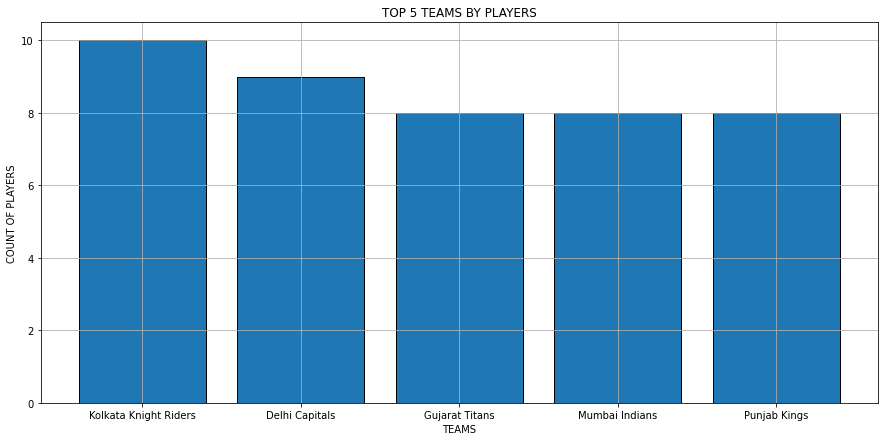

In [262]:
plt.figure(figsize=(15, 7))
plt.bar(players_sort.index, players_sort.values, edgecolor='black')
plt.grid()
plt.xlabel('TEAMS')
plt.ylabel('COUNT OF PLAYERS')
plt.title('TOP 5 TEAMS BY PLAYERS')

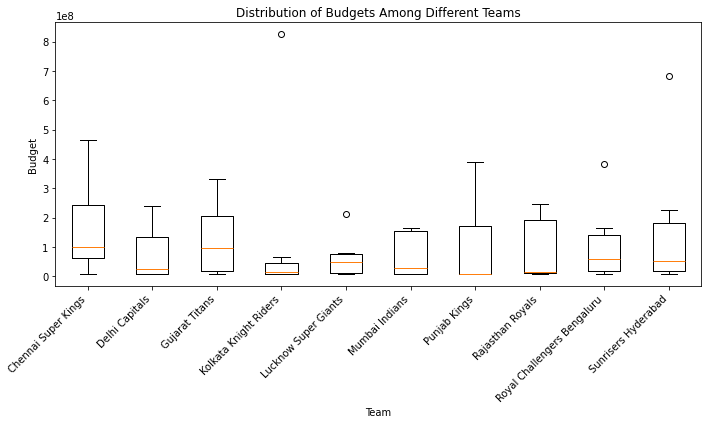

In [265]:

# Group data by team
grouped_data = data.groupby('TEAM')['PRICE PAID'].apply(list)

# Create a box plot to visualize the distribution of budgets among different teams
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data.values, labels=grouped_data.index)
plt.title('Distribution of Budgets Among Different Teams')
plt.xlabel('Team')
plt.ylabel('Budget')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### This is the comprehensive data analysis and visualization of IPL auction 2024!

# THANKS!